In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
#1
baseDados = pd.read_csv('StudentsPerformance.csv')
baseDados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
#2
print("Descricao DataFrame:\n ",baseDados.describe())
print("Tamanho DataFrame:",baseDados.shape)
print("Possui valor null?", baseDados.isnull().values.any() )
print("Soma valores nulos:\n",baseDados.isnull().sum())

Descricao DataFrame:
         math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
Tamanho DataFrame: (1000, 8)
Possui valor null? False
Soma valores nulos:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [48]:
baseDados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
baseDados['total score'] = baseDados[['math score','reading score','writing score']].mean(axis=1)
# 1 = média acima de 80, 0 = média <= 80
baseDados['aprovado'] = (baseDados['total score'] >= 80).astype(int)

In [80]:
#3 Codificar variáveis categoricas
le = LabelEncoder()
for col in['gender','race/ethnicity', 'parental level of education','lunch', 'test preparation course']:
    baseDados[col] = le.fit_transform(baseDados[col])

In [81]:
#4 Separar target e features
x = baseDados[['gender','race/ethnicity', 'parental level of education','lunch', 'test preparation course']]
y = baseDados['aprovado']

In [82]:
#6 separar testes e treino
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=8)

In [83]:
#7 Treinar modelo
model = RandomForestClassifier()
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
#8 previsões
y_pred = model.predict(x_test)

In [85]:
print("Acurácia: \n",accuracy_score(y_test,y_pred))
print("Matriz de confusão: \n", confusion_matrix(y_test,y_pred))
print("Reporte de classificação: \n", classification_report(y_test, y_pred))

Acurácia: 
 0.7633333333333333
Matriz de confusão: 
 [[218  25]
 [ 46  11]]
Reporte de classificação: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       243
           1       0.31      0.19      0.24        57

    accuracy                           0.76       300
   macro avg       0.57      0.55      0.55       300
weighted avg       0.73      0.76      0.74       300



In [78]:
importancias = pd.DataFrame({
    'Variável': X.columns,
    'Importância': model.feature_importances_
}).sort_values(by='Importância', ascending=False)

print(importancias)

                      Variável  Importância
6                reading score     0.387677
7                writing score     0.304083
5                   math score     0.242430
1               race/ethnicity     0.016502
0                       gender     0.014678
2  parental level of education     0.014465
4      test preparation course     0.013676
3                        lunch     0.006490


In [79]:
# Exemplo de predição de um novo aluno
novo_aluno = pd.DataFrame([{
    'gender': le.fit_transform(['male'])[0],  # usa o mesmo LabelEncoder do treino
    'race/ethnicity': le.fit_transform(['group B'])[0],
    'parental level of education': le.fit_transform(['bachelor\'s degree'])[0],
    'lunch': le.fit_transform(['standard'])[0],
    'test preparation course': le.fit_transform(['completed'])[0],
    'math score': 45,
    'reading score': 88,
    'writing score': 54
}])

previsao = model.predict(novo_aluno)
print("Passou" if previsao[0] == 1 else "Não passou")

Não passou


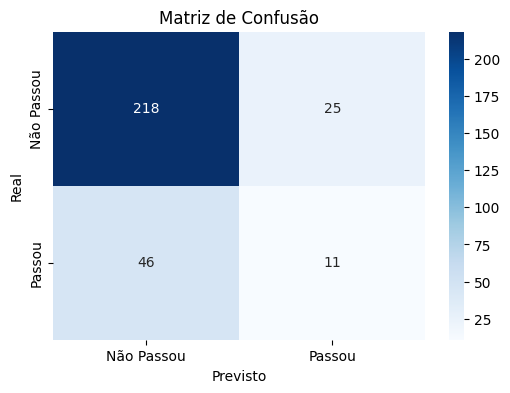

In [86]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Não Passou", "Passou"], yticklabels=["Não Passou", "Passou"])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()